<b>Summary:</b> Using cifar dataset from torchvission of pytorch to create CNN classifier from scratch

In [1]:
# !pip install natsort
# !pip install cv2

In [169]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2

In [170]:
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
import torch
import torchvision
import torchvision.transforms as transforms    
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

In [172]:
dataset1 = pd.read_csv(r"reference.csv")

In [173]:
path_to_folder = os.getcwd() + "/images"

In [174]:
list1 = os.listdir(path_to_folder)
save_path = "./canny_images"

In [175]:
read_path = "./images"

## Convert to Canny images

In [176]:
# import cv2 

# for i in range(len(list1)):
#     try:
#         print(i)
#         imgpath = read_path + "/" + list1[i]
#         print(imgpath)
#         img2 = cv2.imread(imgpath)
#         print(img2)
#         #applying canny filter
#         canny = cv2.Canny(img2,100,200)
#         print(canny)

#         #saving Image        
#         new_name = save_path + "/" + list1[i]
#         print(new_name)
#         cv2.imwrite(new_name,canny)
#     except:
#         print(list1[i])

In [177]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import natsort
from PIL import Image
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature

In [178]:
# trainset = torchvision.datasets.CIFAR10(root='./datasets',
#                                         train=True,
#                                         download=True,
#                                         transform=transforms.ToTensor())

In [179]:
#trainset = torchvision.datasets.ImageFolder(root='./images',transform=transforms.Compose([transforms.Resize((48,48)), transforms.ToTensor()]))

In [180]:
class img_data():
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        tensor_image = tensor_image.flatten()
        name = img_loc.replace('./canny_images/', '')
        return tensor_image, name

In [181]:
img_folder_path='./images'
img_folder_path="./canny_images"
fulldata = img_data(img_folder_path, transform=transforms.Compose([transforms.Resize((48,48)),transforms.ToTensor() ]))
#train_loader = data.DataLoader(my_dataset , batch_size=batch_size, shuffle=False, 
 #                              num_workers=4, drop_last=True)

In [182]:
for i in fulldata:
    print(i)
    break

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'image_1.jpg')


In [183]:
train_size = int(0.8 * len(fulldata))
test_size = len(fulldata) - train_size
trainset, testset = torch.utils.data.random_split(fulldata, [train_size, test_size])

In [184]:
for i in trainset:
    print(i)
    break

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'image_222.png')


In [185]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=3,
                                          shuffle=True,
                                          num_workers=2)

In [186]:
for image , image_names in trainloader:        
    print(image_names)
    break

('image_7.png', 'image_5389.png', 'image_2449.jpg')


for i, (images, labels) in enumerate(trainloader, 0):
    print(labels)


In [187]:
for j,k in enumerate(trainloader):
    print(j,k)
    break

0 [tensor([[0.0353, 0.0431, 0.0431,  ..., 0.1176, 0.1451, 0.1020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0549, 0.0588],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]), ('image_805.jpeg', 'image_1680.png', 'image_1459.jpg')]


In [188]:
testloader = torch.utils.data.DataLoader(testset,      #should be testset
                                         batch_size=8,
                                         shuffle=False,
                                         num_workers=2)

In [189]:
import pandas as pd
df = pd.read_csv('labels.csv')
df = df.iloc[:,1:]
df

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [190]:
set(df['sarcasm'].tolist())






{'general', 'not_sarcastic', 'twisted_meaning', 'very_twisted'}

In [222]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.dropna(inplace =True)
le.fit(df['text_corrected'])
list2 = df['text_corrected'].tolist()
list3=le.transform(list2)



df.dropna(inplace =True)
le.fit(df['humour'])
list4 = df['humour'].tolist()

for i in range(len(list4)):
    if list4[i] == 'funny':
        list4[i] = 'not_funny'
        
    if list4[i] == 'hilarious':
        list4[i]= 'funny'
        
    if list4[i] == 'very_funny':
        list4[i] = 'funny'
        
print(set(list4))

    

list5=le.transform(list4)
for i in range(len(list5)):
    if list5[i] == 2:
        list5[i] = 1



df.dropna(inplace =True)
le.fit(df['sarcasm'])
list6 = df['sarcasm'].tolist()

for i in range(len(list6)):
        
    if list6[i] == 'not_sarcastic':
        list6[i]= 'not_sarcastic'
        
    if list6[i] == 'twisted_meaning':
        list6[i] = 'general'
    
    if list6[i] == 'very_twisted':
        list6[i] = 'not_sarcastic'
        
print(set(list6))

list7=le.transform(list6)



print("kidhr error?")

df.dropna(inplace =True)
le.fit(df['offensive'])
list8 = df['offensive'].tolist()

for i in range(len(list8)):
    if list8[i] == 'not_offensive':
        list8[i] = 'not_offensive'
        
    if list8[i] == 'hateful_offensive':
        list8[i]= 'hateful_offensive'
        
    if list8[i] == 'slight':
        list8[i] = 'not_offensive'
    
    if list8[i] == 'very_offensive':
        list8[i] = 'hateful_offensive'
        
print(set(list8))



list9=le.transform(list8)



df.dropna(inplace =True)
le.fit(df['motivational'])
list10 = df['motivational'].tolist()
list11=le.transform(list10)


df.dropna(inplace =True)
le.fit(df['overall_sentiment'])
list12 = df['overall_sentiment'].tolist()
list13=le.transform(list12)



#TEXT CORRECTED
en_df = pd.DataFrame()
#en_df['text_corrected']=list3
en_df['humour']=list5
en_df['sarcasm']=list7
en_df['offensive']=list9
en_df['motivational']=list11
#en_df['overall_sentiment']=list12

en_df['image_name']=df['image_name']

en_df

{'not_funny', 'funny'}
{'not_sarcastic', 'general'}
kidhr error?
{'hateful_offensive', 'not_offensive'}


,humour,sarcasm,offensive,motivational,image_name
0,0,0,1,1,image_1.jpg
1,1,0,1,0,image_2.jpeg
2,0,1,1,1,image_3.JPG
3,0,0,0,0,image_4.png
4,0,1,0,1,image_5.png
...,...,...,...,...,...
6825,0,0,0,0,image_6826.png
6826,1,0,1,1,image_6827.jpg
6827,1,0,1,1,image_6828.jpg
6828,1,0,1,0,image_6829.jpg


In [223]:
print(set(en_df['humour'].tolist()))

{0, 1}


## TFID vectorizer

In [224]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# v = TfidfVectorizer()
# #c= countvectorizer = CountVectorizer()

# corr_text = df['text_corrected']
# print(corr_text[1])
# print(corr_text[0])
# x = v.fit_transform(corr_text)
# #count_wm = countvectorizer.fit_transform(train)
# #df['text'] = x.toarray()

# array = x.toarray()
# listq = []
# meme_vect = []

# for i in range(0,len(array)):
#    # print(array[i].mean())
#     listq.append(array[i].mean()*1000)
#     meme_vect.append(torch.tensor(array[i]))
#     print(meme_vect[i])
#     print(len(meme_vect[i]))
    

    


# en_df['text_corrected']




In [225]:
df["text_corrected"]

0       LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1       The best of #10 YearChallenge! Completed in le...
2       Sam Thorne @Strippin ( Follow Follow Saw every...
3                   10 Year Challenge - Sweet Dee Edition
4       10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                              ...                        
6987    Tuesday is Mardi Gras Wednesday is Valentine's...
6988    MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...
6989    LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...
6990    When I have time is a fantasy. no one has time...
6991    The starting point for every good idea is "Wha...
Name: text_corrected, Length: 6830, dtype: object

In [226]:
#getting the glove 6b file read

embeddings_index = {}
file = open('glove.6B.100d.txt', encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    embeddings_index[word] = coefs
file.close()

print(embeddings_index["there"])

[-0.084215   0.69597    0.28383   -0.22497   -0.55923    0.21196
 -0.15175    0.31601    0.24803   -0.36385    0.2252     0.34109
  0.61438    0.08318    0.74894   -0.38785   -0.27211    0.2656
 -0.66332    0.45571    0.34949    0.38635    0.25707   -0.60101
 -0.047292  -0.41198    0.38246   -0.52151    0.037757  -0.42492
 -0.36352   -0.037377   0.31263    0.19709    0.008142   0.53871
 -0.074505   0.31395    0.35129   -0.39005   -0.5474    -0.11395
  0.076668  -0.61069    0.15894   -0.33043    0.75967   -0.52289
 -0.38957   -0.71164    0.28724   -0.35683    0.050529   1.3392
 -0.16064   -2.9236     0.17524   -0.42109    1.5235     0.85181
 -0.47563    1.1225    -0.48463    0.36458    0.97809   -0.2227
  0.88791    0.068738   0.22557    0.026459  -0.032799  -0.40426
  0.14579   -0.4535     0.47756    0.15933    0.24236    0.0091798
 -1.3502    -0.078424   0.57803   -0.50061   -0.19374    0.29587
 -1.2316    -0.099825   0.31661   -0.46539   -0.54243   -0.13506
 -0.12897   -0.29543   -0.

In [227]:
import nltk


dict_Vect = {}

sentences = df['text_corrected'].tolist()

glove_vect_sent = []
o =0
for k in range(0,len(sentences)):
    one_sent_vect = [0]*100

    nltk_tokens = nltk.word_tokenize(sentences[k].lower())

    arr = np.array([],dtype='float64')
    for i in nltk_tokens:
        try:
            list1 = embeddings_index[i]
            one_sent_vect = [sum(x) for x in zip(one_sent_vect,list1)]

        except:
            print("word not found")
            o=o+1


        #For averaging Bad mein dekhon ga

        #for c in range(0,100):
        #    one_sent_vect[c] = one_sent_vect[c]/(len(sentences[k])-o)

    print("length of list is:", len(one_sent_vect))
    
    glove_vect_sent.append(one_sent_vect)
    print("total vectors:", len(glove_vect_sent))
        

        

            

    


word not found
word not found
length of list is: 100
total vectors: 1
word not found
word not found
length of list is: 100
total vectors: 2
word not found
word not found
word not found
length of list is: 100
total vectors: 3
length of list is: 100
total vectors: 4
length of list is: 100
total vectors: 5
word not found
word not found
length of list is: 100
total vectors: 6
word not found
length of list is: 100
total vectors: 7
word not found
length of list is: 100
total vectors: 8
word not found
length of list is: 100
total vectors: 9
length of list is: 100
total vectors: 10
word not found
length of list is: 100
total vectors: 11
word not found
length of list is: 100
total vectors: 12
length of list is: 100
total vectors: 13
word not found
length of list is: 100
total vectors: 14
word not found
length of list is: 100
total vectors: 15
length of list is: 100
total vectors: 16
length of list is: 100
total vectors: 17
length of list is: 100
total vectors: 18
length of list is: 100
total ve

length of list is: 100
total vectors: 235
length of list is: 100
total vectors: 236
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 237
word not found
length of list is: 100
total vectors: 238
length of list is: 100
total vectors: 239
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 240
word not found
word not found
length of list is: 100
total vectors: 241
word not found
length of list is: 100
total vectors: 242
length of list is: 100
total vectors: 243
length of list is: 100
total vectors: 244
word not found
word not found
length of list is: 100
total vectors: 245
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 246
length of list is: 100
total vectors: 247
word not found
length of list is: 100
total vectors: 248
length of list is: 100
total vectors: 249
word not found
length of list is: 100
total vectors: 250
word not found
word not foun

total vectors: 417
length of list is: 100
total vectors: 418
word not found
word not found
length of list is: 100
total vectors: 419
word not found
word not found
length of list is: 100
total vectors: 420
word not found
word not found
length of list is: 100
total vectors: 421
length of list is: 100
total vectors: 422
length of list is: 100
total vectors: 423
length of list is: 100
total vectors: 424
length of list is: 100
total vectors: 425
word not found
length of list is: 100
total vectors: 426
length of list is: 100
total vectors: 427
length of list is: 100
total vectors: 428
length of list is: 100
total vectors: 429
word not found
length of list is: 100
total vectors: 430
length of list is: 100
total vectors: 431
word not found
word not found
length of list is: 100
total vectors: 432
length of list is: 100
total vectors: 433
length of list is: 100
total vectors: 434
word not found
length of list is: 100
total vectors: 435
length of list is: 100
total vectors: 436
length of list is:

total vectors: 636
word not found
word not found
length of list is: 100
total vectors: 637
length of list is: 100
total vectors: 638
length of list is: 100
total vectors: 639
length of list is: 100
total vectors: 640
word not found
length of list is: 100
total vectors: 641
length of list is: 100
total vectors: 642
length of list is: 100
total vectors: 643
word not found
word not found
length of list is: 100
total vectors: 644
word not found
length of list is: 100
total vectors: 645
word not found
length of list is: 100
total vectors: 646
word not found
length of list is: 100
total vectors: 647
word not found
length of list is: 100
total vectors: 648
length of list is: 100
total vectors: 649
length of list is: 100
total vectors: 650
length of list is: 100
total vectors: 651
length of list is: 100
total vectors: 652
word not found
length of list is: 100
total vectors: 653
length of list is: 100
total vectors: 654
length of list is: 100
total vectors: 655
word not found
length of list is:

length of list is: 100
total vectors: 875
word not found
word not found
length of list is: 100
total vectors: 876
word not found
length of list is: 100
total vectors: 877
word not found
length of list is: 100
total vectors: 878
word not found
word not found
length of list is: 100
total vectors: 879
word not found
length of list is: 100
total vectors: 880
word not found
word not found
word not found
length of list is: 100
total vectors: 881
word not found
length of list is: 100
total vectors: 882
length of list is: 100
total vectors: 883
word not found
length of list is: 100
total vectors: 884
word not found
word not found
word not found
length of list is: 100
total vectors: 885
word not found
length of list is: 100
total vectors: 886
length of list is: 100
total vectors: 887
length of list is: 100
total vectors: 888
word not found
length of list is: 100
total vectors: 889
word not found
length of list is: 100
total vectors: 890
word not found
length of list is: 100
total vectors: 891
l

total vectors: 1092
length of list is: 100
total vectors: 1093
length of list is: 100
total vectors: 1094
length of list is: 100
total vectors: 1095
word not found
word not found
length of list is: 100
total vectors: 1096
word not found
length of list is: 100
total vectors: 1097
word not found
length of list is: 100
total vectors: 1098
length of list is: 100
total vectors: 1099
word not found
word not found
word not found
length of list is: 100
total vectors: 1100
word not found
length of list is: 100
total vectors: 1101
word not found
length of list is: 100
total vectors: 1102
length of list is: 100
total vectors: 1103
word not found
word not found
length of list is: 100
total vectors: 1104
length of list is: 100
total vectors: 1105
word not found
word not found
word not found
length of list is: 100
total vectors: 1106
word not found
length of list is: 100
total vectors: 1107
word not found
length of list is: 100
total vectors: 1108
length of list is: 100
total vectors: 1109
length of

total vectors: 1309
word not found
length of list is: 100
total vectors: 1310
word not found
length of list is: 100
total vectors: 1311
length of list is: 100
total vectors: 1312
word not found
length of list is: 100
total vectors: 1313
word not found
length of list is: 100
total vectors: 1314
length of list is: 100
total vectors: 1315
length of list is: 100
total vectors: 1316
word not found
length of list is: 100
total vectors: 1317
length of list is: 100
total vectors: 1318
length of list is: 100
total vectors: 1319
length of list is: 100
total vectors: 1320
word not found
length of list is: 100
total vectors: 1321
length of list is: 100
total vectors: 1322
word not found
word not found
length of list is: 100
total vectors: 1323
length of list is: 100
total vectors: 1324
length of list is: 100
total vectors: 1325
word not found
length of list is: 100
total vectors: 1326
word not found
word not found
length of list is: 100
total vectors: 1327
word not found
length of list is: 100
tot

length of list is: 100
total vectors: 1520
length of list is: 100
total vectors: 1521
word not found
word not found
length of list is: 100
total vectors: 1522
length of list is: 100
total vectors: 1523
word not found
word not found
length of list is: 100
total vectors: 1524
length of list is: 100
total vectors: 1525
length of list is: 100
total vectors: 1526
length of list is: 100
total vectors: 1527
length of list is: 100
total vectors: 1528
word not found
length of list is: 100
total vectors: 1529
word not found
length of list is: 100
total vectors: 1530
length of list is: 100
total vectors: 1531
length of list is: 100
total vectors: 1532
word not found
length of list is: 100
total vectors: 1533
word not found
word not found
word not found
length of list is: 100
total vectors: 1534
word not found
word not found
word not found
length of list is: 100
total vectors: 1535
length of list is: 100
total vectors: 1536
word not found
word not found
length of list is: 100
total vectors: 1537
w

total vectors: 1753
word not found
length of list is: 100
total vectors: 1754
word not found
length of list is: 100
total vectors: 1755
word not found
length of list is: 100
total vectors: 1756
length of list is: 100
total vectors: 1757
length of list is: 100
total vectors: 1758
word not found
length of list is: 100
total vectors: 1759
length of list is: 100
total vectors: 1760
word not found
length of list is: 100
total vectors: 1761
word not found
length of list is: 100
total vectors: 1762
word not found
length of list is: 100
total vectors: 1763
word not found
length of list is: 100
total vectors: 1764
length of list is: 100
total vectors: 1765
length of list is: 100
total vectors: 1766
word not found
word not found
length of list is: 100
total vectors: 1767
word not found
length of list is: 100
total vectors: 1768
word not found
word not found
length of list is: 100
total vectors: 1769
word not found
word not found
length of list is: 100
total vectors: 1770
word not found
word not 

length of list is: 100
total vectors: 1988
length of list is: 100
total vectors: 1989
word not found
word not found
length of list is: 100
total vectors: 1990
length of list is: 100
total vectors: 1991
word not found
length of list is: 100
total vectors: 1992
word not found
length of list is: 100
total vectors: 1993
word not found
length of list is: 100
total vectors: 1994
word not found
length of list is: 100
total vectors: 1995
length of list is: 100
total vectors: 1996
word not found
length of list is: 100
total vectors: 1997
length of list is: 100
total vectors: 1998
word not found
length of list is: 100
total vectors: 1999
length of list is: 100
total vectors: 2000
word not found
word not found
length of list is: 100
total vectors: 2001
word not found
length of list is: 100
total vectors: 2002
length of list is: 100
total vectors: 2003
length of list is: 100
total vectors: 2004
length of list is: 100
total vectors: 2005
length of list is: 100
total vectors: 2006
length of list is:

total vectors: 2237
length of list is: 100
total vectors: 2238
length of list is: 100
total vectors: 2239
length of list is: 100
total vectors: 2240
word not found
length of list is: 100
total vectors: 2241
length of list is: 100
total vectors: 2242
length of list is: 100
total vectors: 2243
length of list is: 100
total vectors: 2244
word not found
length of list is: 100
total vectors: 2245
length of list is: 100
total vectors: 2246
word not found
word not found
length of list is: 100
total vectors: 2247
word not found
length of list is: 100
total vectors: 2248
word not found
length of list is: 100
total vectors: 2249
word not found
length of list is: 100
total vectors: 2250
length of list is: 100
total vectors: 2251
word not found
length of list is: 100
total vectors: 2252
length of list is: 100
total vectors: 2253
word not found
length of list is: 100
total vectors: 2254
word not found
length of list is: 100
total vectors: 2255
word not found
length of list is: 100
total vectors: 225

total vectors: 2462
word not found
word not found
length of list is: 100
total vectors: 2463
word not found
length of list is: 100
total vectors: 2464
length of list is: 100
total vectors: 2465
length of list is: 100
total vectors: 2466
length of list is: 100
total vectors: 2467
length of list is: 100
total vectors: 2468
length of list is: 100
total vectors: 2469
word not found
length of list is: 100
total vectors: 2470
length of list is: 100
total vectors: 2471
length of list is: 100
total vectors: 2472
length of list is: 100
total vectors: 2473
word not found
length of list is: 100
total vectors: 2474
word not found
length of list is: 100
total vectors: 2475
word not found
word not found
length of list is: 100
total vectors: 2476
length of list is: 100
total vectors: 2477
length of list is: 100
total vectors: 2478
word not found
length of list is: 100
total vectors: 2479
word not found
length of list is: 100
total vectors: 2480
length of list is: 100
total vectors: 2481
word not foun

length of list is: 100
total vectors: 2694
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 2695
word not found
length of list is: 100
total vectors: 2696
word not found
word not found
length of list is: 100
total vectors: 2697
word not found
length of list is: 100
total vectors: 2698
length of list is: 100
total vectors: 2699
length of list is: 100
total vectors: 2700
word not found
word not found
length of list is: 100
total vectors: 2701
word not found
word not found
length of list is: 100
total vectors: 2702
word not found
word not found
length of list is: 100
total vectors: 2703
word not found
word not found
length of list is: 100
total vectors: 2704
word not found
length of list is: 100
total vectors: 2705
word not found
length of list is: 100
total vectors: 2706
length of list is: 100
total vectors: 2707
word not found
length of list is: 100
total vectors: 2708
word not found
length of list is: 100
total vectors: 2709
word not fou

total vectors: 2962
length of list is: 100
total vectors: 2963
length of list is: 100
total vectors: 2964
length of list is: 100
total vectors: 2965
word not found
length of list is: 100
total vectors: 2966
length of list is: 100
total vectors: 2967
word not found
length of list is: 100
total vectors: 2968
word not found
length of list is: 100
total vectors: 2969
length of list is: 100
total vectors: 2970
length of list is: 100
total vectors: 2971
length of list is: 100
total vectors: 2972
length of list is: 100
total vectors: 2973
length of list is: 100
total vectors: 2974
word not found
length of list is: 100
total vectors: 2975
length of list is: 100
total vectors: 2976
length of list is: 100
total vectors: 2977
length of list is: 100
total vectors: 2978
word not found
length of list is: 100
total vectors: 2979
length of list is: 100
total vectors: 2980
word not found
length of list is: 100
total vectors: 2981
word not found
length of list is: 100
total vectors: 2982
length of list 

total vectors: 3177
length of list is: 100
total vectors: 3178
word not found
length of list is: 100
total vectors: 3179
word not found
length of list is: 100
total vectors: 3180
word not found
length of list is: 100
total vectors: 3181
word not found
length of list is: 100
total vectors: 3182
word not found
length of list is: 100
total vectors: 3183
length of list is: 100
total vectors: 3184
word not found
length of list is: 100
total vectors: 3185
word not found
length of list is: 100
total vectors: 3186
length of list is: 100
total vectors: 3187
length of list is: 100
total vectors: 3188
length of list is: 100
total vectors: 3189
word not found
length of list is: 100
total vectors: 3190
word not found
length of list is: 100
total vectors: 3191
word not found
length of list is: 100
total vectors: 3192
word not found
length of list is: 100
total vectors: 3193
length of list is: 100
total vectors: 3194
word not found
length of list is: 100
total vectors: 3195
length of list is: 100
tot

length of list is: 100
total vectors: 3422
word not found
length of list is: 100
total vectors: 3423
word not found
length of list is: 100
total vectors: 3424
word not found
length of list is: 100
total vectors: 3425
length of list is: 100
total vectors: 3426
word not found
length of list is: 100
total vectors: 3427
word not found
length of list is: 100
total vectors: 3428
word not found
length of list is: 100
total vectors: 3429
length of list is: 100
total vectors: 3430
word not found
word not found
length of list is: 100
total vectors: 3431
word not found
length of list is: 100
total vectors: 3432
word not found
word not found
length of list is: 100
total vectors: 3433
length of list is: 100
total vectors: 3434
word not found
length of list is: 100
total vectors: 3435
word not found
word not found
length of list is: 100
total vectors: 3436
length of list is: 100
total vectors: 3437
word not found
word not found
word not found
word not found
word not found
length of list is: 100
tota

length of list is: 100
total vectors: 3641
word not found
length of list is: 100
total vectors: 3642
word not found
length of list is: 100
total vectors: 3643
length of list is: 100
total vectors: 3644
length of list is: 100
total vectors: 3645
word not found
length of list is: 100
total vectors: 3646
length of list is: 100
total vectors: 3647
word not found
length of list is: 100
total vectors: 3648
word not found
length of list is: 100
total vectors: 3649
word not found
word not found
length of list is: 100
total vectors: 3650
length of list is: 100
total vectors: 3651
word not found
length of list is: 100
total vectors: 3652
word not found
length of list is: 100
total vectors: 3653
word not found
length of list is: 100
total vectors: 3654
word not found
length of list is: 100
total vectors: 3655
word not found
word not found
length of list is: 100
total vectors: 3656
word not found
length of list is: 100
total vectors: 3657
length of list is: 100
total vectors: 3658
word not found
l

word not found
length of list is: 100
total vectors: 3837
word not found
length of list is: 100
total vectors: 3838
word not found
length of list is: 100
total vectors: 3839
length of list is: 100
total vectors: 3840
word not found
length of list is: 100
total vectors: 3841
word not found
length of list is: 100
total vectors: 3842
word not found
length of list is: 100
total vectors: 3843
word not found
word not found
word not found
length of list is: 100
total vectors: 3844
length of list is: 100
total vectors: 3845
word not found
word not found
length of list is: 100
total vectors: 3846
length of list is: 100
total vectors: 3847
word not found
word not found
word not found
length of list is: 100
total vectors: 3848
length of list is: 100
total vectors: 3849
word not found
word not found
length of list is: 100
total vectors: 3850
word not found
length of list is: 100
total vectors: 3851
length of list is: 100
total vectors: 3852
word not found
word not found
length of list is: 100
tota

length of list is: 100
total vectors: 4010
word not found
length of list is: 100
total vectors: 4011
word not found
length of list is: 100
total vectors: 4012
length of list is: 100
total vectors: 4013
word not found
word not found
word not found
length of list is: 100
total vectors: 4014
length of list is: 100
total vectors: 4015
length of list is: 100
total vectors: 4016
length of list is: 100
total vectors: 4017
word not found
length of list is: 100
total vectors: 4018
word not found
word not found
length of list is: 100
total vectors: 4019
word not found
length of list is: 100
total vectors: 4020
length of list is: 100
total vectors: 4021
length of list is: 100
total vectors: 4022
length of list is: 100
total vectors: 4023
length of list is: 100
total vectors: 4024
word not found
length of list is: 100
total vectors: 4025
word not found
length of list is: 100
total vectors: 4026
length of list is: 100
total vectors: 4027
word not found
word not found
length of list is: 100
total ve

word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 4291
word not found
word not found
length of list is: 100
total vectors: 4292
length of list is: 100
total vectors: 4293
length of list is: 100
total vectors: 4294
word not found
word not found
length of list is: 100
total vectors: 4295
word not found
word not found
length of list is: 100
total vectors: 4296
length of list is: 100
total vectors: 4297
word not found
length of list is: 100
total vectors: 4298
word not found
word not found
word not found
length of list is: 100
total vectors: 4299
word not found
length of list is: 100
total vectors: 4300
length of list is: 100
total vectors: 4301
length of list is: 100
total vectors: 4302
word not found
length of list is: 100
total vectors: 4303
word not found
word not found
length of list is: 100
total vectors: 4304
word not found
word not found
length of list is: 100
total vectors: 4305
length of list is: 100
total vectors: 4306
word not fou

total vectors: 4499
length of list is: 100
total vectors: 4500
length of list is: 100
total vectors: 4501
length of list is: 100
total vectors: 4502
word not found
length of list is: 100
total vectors: 4503
length of list is: 100
total vectors: 4504
word not found
length of list is: 100
total vectors: 4505
word not found
length of list is: 100
total vectors: 4506
length of list is: 100
total vectors: 4507
length of list is: 100
total vectors: 4508
length of list is: 100
total vectors: 4509
length of list is: 100
total vectors: 4510
word not found
word not found
length of list is: 100
total vectors: 4511
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 4512
length of list is: 100
total vectors: 4513
word not found
length of list is: 100
total vectors: 4514
word not found
length of list is: 100
total vectors: 4515
length of list is: 100
total vectors: 4516
length of list is: 100
total vectors: 4517
length of list is: 100
total vectors: 451

word not found
word not found
length of list is: 100
total vectors: 4765
length of list is: 100
total vectors: 4766
word not found
length of list is: 100
total vectors: 4767
length of list is: 100
total vectors: 4768
word not found
length of list is: 100
total vectors: 4769
word not found
length of list is: 100
total vectors: 4770
word not found
length of list is: 100
total vectors: 4771
word not found
length of list is: 100
total vectors: 4772
word not found
length of list is: 100
total vectors: 4773
word not found
length of list is: 100
total vectors: 4774
word not found
length of list is: 100
total vectors: 4775
length of list is: 100
total vectors: 4776
length of list is: 100
total vectors: 4777
length of list is: 100
total vectors: 4778
word not found
length of list is: 100
total vectors: 4779
word not found
word not found
length of list is: 100
total vectors: 4780
word not found
length of list is: 100
total vectors: 4781
word not found
length of list is: 100
total vectors: 4782
w

total vectors: 4958
word not found
length of list is: 100
total vectors: 4959
length of list is: 100
total vectors: 4960
length of list is: 100
total vectors: 4961
word not found
length of list is: 100
total vectors: 4962
length of list is: 100
total vectors: 4963
length of list is: 100
total vectors: 4964
length of list is: 100
total vectors: 4965
word not found
length of list is: 100
total vectors: 4966
length of list is: 100
total vectors: 4967
length of list is: 100
total vectors: 4968
length of list is: 100
total vectors: 4969
length of list is: 100
total vectors: 4970
word not found
length of list is: 100
total vectors: 4971
word not found
word not found
word not found
length of list is: 100
total vectors: 4972
length of list is: 100
total vectors: 4973
word not found
length of list is: 100
total vectors: 4974
length of list is: 100
total vectors: 4975
length of list is: 100
total vectors: 4976
word not found
word not found
word not found
word not found
word not found
length of l

total vectors: 5151
word not found
length of list is: 100
total vectors: 5152
length of list is: 100
total vectors: 5153
length of list is: 100
total vectors: 5154
word not found
word not found
word not found
length of list is: 100
total vectors: 5155
word not found
length of list is: 100
total vectors: 5156
word not found
length of list is: 100
total vectors: 5157
length of list is: 100
total vectors: 5158
length of list is: 100
total vectors: 5159
word not found
length of list is: 100
total vectors: 5160
length of list is: 100
total vectors: 5161
length of list is: 100
total vectors: 5162
length of list is: 100
total vectors: 5163
word not found
length of list is: 100
total vectors: 5164
length of list is: 100
total vectors: 5165
word not found
length of list is: 100
total vectors: 5166
length of list is: 100
total vectors: 5167
word not found
length of list is: 100
total vectors: 5168
length of list is: 100
total vectors: 5169
word not found
word not found
length of list is: 100
tot

length of list is: 100
total vectors: 5358
word not found
length of list is: 100
total vectors: 5359
word not found
word not found
word not found
word not found
word not found
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 5360
word not found
length of list is: 100
total vectors: 5361
word not found
length of list is: 100
total vectors: 5362
length of list is: 100
total vectors: 5363
word not found
length of list is: 100
total vectors: 5364
word not found
length of list is: 100
total vectors: 5365
length of list is: 100
total vectors: 5366
length of list is: 100
total vectors: 5367
length of list is: 100
total vectors: 5368
word not found
word not found
length of list is: 100
total vectors: 5369
word not found
length of list is: 100
total vectors: 5370
length of list is: 100
total vectors: 5371
length of list is: 100
total vectors: 5372
word not found
length of list is: 100
total vectors: 5373
word not found
length of list is: 100
tota

word not found
length of list is: 100
total vectors: 5547
length of list is: 100
total vectors: 5548
word not found
length of list is: 100
total vectors: 5549
word not found
word not found
word not found
length of list is: 100
total vectors: 5550
length of list is: 100
total vectors: 5551
length of list is: 100
total vectors: 5552
word not found
length of list is: 100
total vectors: 5553
word not found
word not found
length of list is: 100
total vectors: 5554
word not found
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 5555
length of list is: 100
total vectors: 5556
word not found
word not found
length of list is: 100
total vectors: 5557
length of list is: 100
total vectors: 5558
word not found
word not found
length of list is: 100
total vectors: 5559
length of list is: 100
total vectors: 5560
word not found
word not found
length of list is: 100
total vectors: 5561
word not found
length of list is: 100
total vectors: 5562
length of li

total vectors: 5760
length of list is: 100
total vectors: 5761
word not found
length of list is: 100
total vectors: 5762
word not found
length of list is: 100
total vectors: 5763
word not found
length of list is: 100
total vectors: 5764
length of list is: 100
total vectors: 5765
length of list is: 100
total vectors: 5766
word not found
length of list is: 100
total vectors: 5767
word not found
word not found
length of list is: 100
total vectors: 5768
length of list is: 100
total vectors: 5769
length of list is: 100
total vectors: 5770
length of list is: 100
total vectors: 5771
word not found
length of list is: 100
total vectors: 5772
length of list is: 100
total vectors: 5773
length of list is: 100
total vectors: 5774
word not found
length of list is: 100
total vectors: 5775
word not found
length of list is: 100
total vectors: 5776
word not found
word not found
word not found
length of list is: 100
total vectors: 5777
length of list is: 100
total vectors: 5778
length of list is: 100
tot

length of list is: 100
total vectors: 5947
length of list is: 100
total vectors: 5948
word not found
length of list is: 100
total vectors: 5949
word not found
length of list is: 100
total vectors: 5950
word not found
length of list is: 100
total vectors: 5951
length of list is: 100
total vectors: 5952
length of list is: 100
total vectors: 5953
word not found
length of list is: 100
total vectors: 5954
length of list is: 100
total vectors: 5955
length of list is: 100
total vectors: 5956
word not found
length of list is: 100
total vectors: 5957
length of list is: 100
total vectors: 5958
word not found
word not found
length of list is: 100
total vectors: 5959
word not found
word not found
length of list is: 100
total vectors: 5960
word not found
length of list is: 100
total vectors: 5961
word not found
length of list is: 100
total vectors: 5962
word not found
length of list is: 100
total vectors: 5963
word not found
length of list is: 100
total vectors: 5964
word not found
length of list i

total vectors: 6134
length of list is: 100
total vectors: 6135
length of list is: 100
total vectors: 6136
word not found
length of list is: 100
total vectors: 6137
length of list is: 100
total vectors: 6138
length of list is: 100
total vectors: 6139
length of list is: 100
total vectors: 6140
length of list is: 100
total vectors: 6141
length of list is: 100
total vectors: 6142
word not found
length of list is: 100
total vectors: 6143
word not found
length of list is: 100
total vectors: 6144
length of list is: 100
total vectors: 6145
word not found
length of list is: 100
total vectors: 6146
word not found
length of list is: 100
total vectors: 6147
word not found
length of list is: 100
total vectors: 6148
length of list is: 100
total vectors: 6149
word not found
length of list is: 100
total vectors: 6150
length of list is: 100
total vectors: 6151
word not found
word not found
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 6152
length of l

length of list is: 100
total vectors: 6353
word not found
length of list is: 100
total vectors: 6354
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 6355
length of list is: 100
total vectors: 6356
length of list is: 100
total vectors: 6357
word not found
length of list is: 100
total vectors: 6358
word not found
length of list is: 100
total vectors: 6359
word not found
length of list is: 100
total vectors: 6360
word not found
length of list is: 100
total vectors: 6361
word not found
length of list is: 100
total vectors: 6362
word not found
length of list is: 100
total vectors: 6363
length of list is: 100
total vectors: 6364
word not found
word not found
length of list is: 100
total vectors: 6365
word not found
word not found
word not found
length of list is: 100
total vectors: 6366
length of list is: 100
total vectors: 6367
word not found
length of list is: 100
total vectors: 6368
length of list is: 100
total vectors: 6369
length of list

length of list is: 100
total vectors: 6547
length of list is: 100
total vectors: 6548
word not found
word not found
length of list is: 100
total vectors: 6549
word not found
word not found
length of list is: 100
total vectors: 6550
length of list is: 100
total vectors: 6551
word not found
length of list is: 100
total vectors: 6552
word not found
word not found
length of list is: 100
total vectors: 6553
word not found
word not found
length of list is: 100
total vectors: 6554
length of list is: 100
total vectors: 6555
length of list is: 100
total vectors: 6556
length of list is: 100
total vectors: 6557
word not found
length of list is: 100
total vectors: 6558
length of list is: 100
total vectors: 6559
length of list is: 100
total vectors: 6560
word not found
length of list is: 100
total vectors: 6561
length of list is: 100
total vectors: 6562
word not found
length of list is: 100
total vectors: 6563
length of list is: 100
total vectors: 6564
length of list is: 100
total vectors: 6565
len

length of list is: 100
total vectors: 6760
length of list is: 100
total vectors: 6761
length of list is: 100
total vectors: 6762
length of list is: 100
total vectors: 6763
length of list is: 100
total vectors: 6764
length of list is: 100
total vectors: 6765
word not found
length of list is: 100
total vectors: 6766
word not found
word not found
word not found
word not found
length of list is: 100
total vectors: 6767
word not found
length of list is: 100
total vectors: 6768
length of list is: 100
total vectors: 6769
word not found
length of list is: 100
total vectors: 6770
length of list is: 100
total vectors: 6771
length of list is: 100
total vectors: 6772
length of list is: 100
total vectors: 6773
word not found
word not found
word not found
length of list is: 100
total vectors: 6774
length of list is: 100
total vectors: 6775
length of list is: 100
total vectors: 6776
length of list is: 100
total vectors: 6777
length of list is: 100
total vectors: 6778
word not found
length of list is:

In [228]:
tensor_meme = []
for i in glove_vect_sent:
    arr = np.array(i, dtype='float32')
    x_np = torch.from_numpy(arr)
    tensor_meme.append(x_np)
    
print(type(tensor_meme[0]))


<class 'torch.Tensor'>


In [229]:
df['overall_sentiment'].replace('very_positive', 'positive', inplace=True)
df['overall_sentiment'].replace('very_negative', 'negative', inplace=True)

In [230]:
labels= set(df['overall_sentiment'].tolist())
labels

{'negative', 'neutral', 'positive'}

In [231]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


#### Get a batch from the training data
The DataLoader object divides the dataset into batches. Here we examine the first batch of the training data set

In [232]:
images_batch, labels_batch  = iter(trainloader).next()

labels_batch

('image_2125.jpg', 'image_3190.jpg', 'image_3430.jpeg')

#### Check out the shape of this batch of images
The first dimension gives the number of images. The next dimension represents the number of channels. The last two give the image size

In [233]:
#images_batch.shape #number of channels represenent colors of image RGB = 3 

#### Create a grid to display the batch of images
torchvision is a module which contains datasets, model architectures and image transformation tools. Here, we use one of its utilities to create a grid of images from our batch 

In [234]:
img = torchvision.utils.make_grid(images_batch)
img

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0667, 0.0471, 0.0471,  ..., 0.0471, 0.0471, 0.0667],
         [0.0000, 0.0000, 0.0706,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0667, 0.0471, 0.0471,  ..., 0.0471, 0.0471, 0.0667],
         [0.0000, 0.0000, 0.0706,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0667, 0.0471, 0.0471,  ..., 0.0471, 0.0471, 0.0667],
         [0.0000, 0.0000, 0.0706,  ..., 0.0000, 0.0000, 0.0000]]])

In [235]:
img.shape

torch.Size([3, 3, 6912])

In [236]:
np.transpose(img, (1,2,0)).shape

torch.Size([3, 6912, 3])

In [237]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [238]:
import torch.nn as nn

In [239]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.imagelayer = nn.Sequential(    #layer for image
            nn.Linear(6912,100),
            nn.ReLU())
        
        self.textlayer = nn.Sequential(    #layer for text
            nn.Linear(100,100),
            nn.ReLU())

        self.layer3 = nn.Sequential(
            nn.Linear(200,150),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Linear(150,150),
            nn.ReLU()
        )
        
        self.final = nn.Sequential(
            nn.Linear(150,150),
            nn.ReLU())

        
                
        self.humour = nn.Sequential(
        nn.Linear(150,2))
        
        self.sarcasm = nn.Sequential(
        nn.Linear(150,2))
        
        self.offensive = nn.Sequential(
        nn.Linear(150,2))
        
        self.motivational=nn.Sequential(
        nn.Linear(150,2))
        
    def forward(self, x1,x2):
        x = self.imagelayer(x1)
        y = self.textlayer(x2)
        
        out = torch.cat([x,y], dim =1)
        out = self.layer3(out)
        out = self.final(out)
        o1 =self.humour(out)
        o2 =self.sarcasm(out)
        o3 =self.offensive(out)
        o4 =self.motivational(out)
        
        return o1,o2,o3,o4

In [240]:
model = Net()

#### Define the Learning Rate, Loss Function and Optimizer

In [241]:
learning_rate = 0.001 #0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)

#### Training the model

<b>Forward Pass: </b> 
Predict Output from train data and then compute loss using CrossEntropyLoss() defined above

<b>Backward Pass: </b>
Firstly zero all the gradient variables and then back propogate<br>
We are using Adam optimizer to optimize our model at every step


In [242]:
from sklearn import preprocessing
A = pd.DataFrame()
A['overall_sentiment'] = df['overall_sentiment']
total_step = len(trainloader)
num_epochs = 3
le = preprocessing.LabelEncoder()
le.fit(A['overall_sentiment'])
list1 = A['overall_sentiment']

list2 = le.transform(list1)
list2

A['overall_sentiment'] = list2
A['overall_sentiment']
df['sentiment']=list2

In [243]:

l=df[df['image_name']=='image_1.jpg'].loc[:,'sentiment'].tolist()
l

[2]

In [215]:
#en_df[en_df["image_name"]=='image_1.jpg'].loc[:,"text_corrected"]

## Part 1

In [216]:
import itertools

total_step = len(trainloader)
num_epochs = 5
start = 0
end = 3



for epoch in range(num_epochs): 
    try:
        for i,(images , image_names) in enumerate(trainloader):  
            try:

                labels = []#image names

                # in this 'i' will be corrected text
                n = 'motivational'

                for j in image_names:
                    l=en_df[en_df['image_name']== j].loc[:,n].tolist()
                    try:
                        labels.append(l[0])
                    except:
                        labels.append(0)


                text = torch.stack(tensor_meme[start:end]) #corrected text

                label_numpy = np.array(labels,dtype='float32').flatten()
                label_tensor = torch.tensor(label_numpy, dtype=torch.long)

                text = torch.stack(tensor_meme[start:end]) #corrected text in tensor

                start = start+3
                end = end + 3     
                outputs = model(images,text)


                loss = criterion(outputs,label_tensor)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i+1) % 200 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            except:
                    1==1
    except:
        1==1



Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


# multi label

In [246]:
import itertools

total_step = len(trainloader)
num_epochs = 3
start = 0
end = 3
col_names = ['humour','sarcasm','offensive','motivational']


for epoch in range(num_epochs):
    try:
        for i,(images , image_names)  in enumerate(trainloader):
            Loss = 0

            #Decide Labels, what labels we have to choose

            sar =[]
            mot =[]
            offen= []
            hum = []

            for j in image_names:
                l=en_df[en_df['image_name']== j].loc[:,'humour'].tolist()
                try:
                    hum.append(l[0])
                except:
                    hum.append(0)

            for j in image_names:
                l=en_df[en_df['image_name']== j].loc[:,'sarcasm'].tolist()
                try:
                    sar.append(l[0])
                except:
                    sar.append(0)

            for j in image_names:
                l=en_df[en_df['image_name']== j].loc[:,'offensive'].tolist()
                try:
                    offen.append(l[0])
                except:
                    offen.append(0)

            for j in image_names:
                l=en_df[en_df['image_name']== j].loc[:,'motivational'].tolist()
                try:
                    mot.append(l[0])
                except:
                    mot.append(0)

            text = torch.stack(tensor_meme[start:end]) #corrected text


            #print("vectorizer for meme text:", tensor_meme[start:end])
            o1,o2,o3,o4 = model(images,text)

            start = start+3
            end = end + 3

            label_numpy = np.array(sar,dtype='float32').flatten()
            label_tensor = torch.tensor(label_numpy, dtype=torch.long)

            loss1 = criterion(o1,label_tensor)

            label_numpy = np.array(mot,dtype='float32').flatten()
            label_tensor = torch.tensor(label_numpy, dtype=torch.long)
            loss2 = criterion(o2,label_tensor)

            label_numpy = np.array(offen,dtype='float32').flatten()
            label_tensor = torch.tensor(label_numpy, dtype=torch.long)
            loss3 = criterion(o3,label_tensor)

            label_numpy = np.array(hum,dtype='float32').flatten()
            label_tensor = torch.tensor(label_numpy, dtype=torch.long)
            loss4 = criterion(o4,label_tensor)

            loss = loss1 + loss2 + loss3 + loss4


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                #print("For label: ", col, '\n')

                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    except:
        1==1

Epoch [1/3], Step [100/1864], Loss: 2.6093
Epoch [1/3], Step [200/1864], Loss: 2.8324
Epoch [1/3], Step [300/1864], Loss: 2.1837
Epoch [1/3], Step [400/1864], Loss: 3.4749
Epoch [1/3], Step [500/1864], Loss: 3.0524
Epoch [1/3], Step [600/1864], Loss: 2.0553
Epoch [1/3], Step [700/1864], Loss: 2.5886
Epoch [1/3], Step [800/1864], Loss: 2.7694
Epoch [1/3], Step [900/1864], Loss: 2.0707
Epoch [1/3], Step [1000/1864], Loss: 1.8131
Epoch [1/3], Step [1100/1864], Loss: 2.2984
Epoch [1/3], Step [1200/1864], Loss: 2.4106
Epoch [1/3], Step [1300/1864], Loss: 2.2066
Epoch [1/3], Step [1400/1864], Loss: 1.7975
Epoch [1/3], Step [1500/1864], Loss: 1.9956
Epoch [1/3], Step [1600/1864], Loss: 3.1597
Epoch [1/3], Step [1700/1864], Loss: 3.2017
Epoch [1/3], Step [1800/1864], Loss: 2.6220
Epoch [2/3], Step [100/1864], Loss: 2.7857
Epoch [2/3], Step [200/1864], Loss: 2.0033
Epoch [2/3], Step [300/1864], Loss: 3.6855
Epoch [2/3], Step [400/1864], Loss: 2.7296


In [ ]:
from torchviz import make_dot

for i,(images , image_names)  in enumerate(trainloader):
    x= images[0]
    y=tensor_meme[0]
    break

print(y)
print(x)

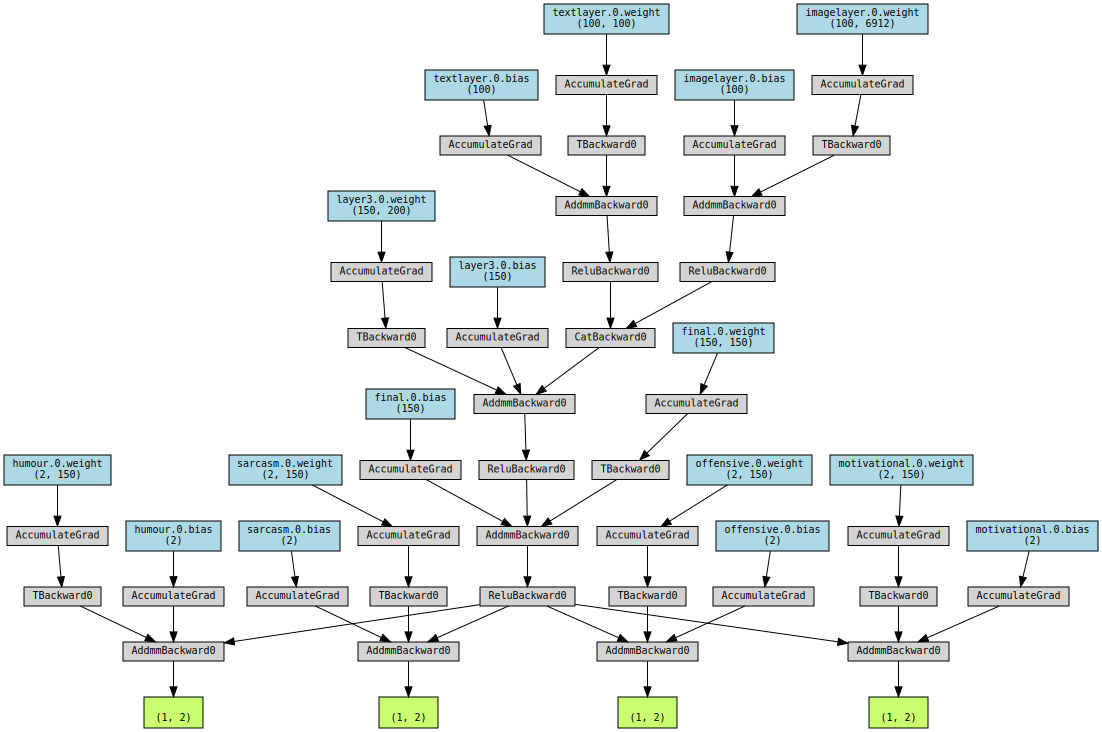

In [86]:
make_dot (model(x.unsqueeze(0),y.unsqueeze(0)),params =dict((model.named_parameters())))


#### Evaluate the model
model.eval() sets our model in evaluation(test) mode <br>
We will use test data to check accuracy of our model

In [261]:
model.eval()  
with torch.no_grad():
        correct = 0
        total = 0
        i = 0 
        start = 0
        end = 3
        for i,(images , image_names)  in enumerate(trainloader):
                
                
                
                text = torch.stack(tensor_meme[start:end]) #corrected text
                start = start + 3
                end = end + 3
                
                o1,o2,o3,o4 = model(images,text)


                
                _, p1 = torch.max(o1.data, 1)
                _, p2 = torch.max(o2.data, 1)
                _, p3 = torch.max(o3.data, 1)
                _, p4 = torch.max(o4.data, 1)
                                        



                total += o1.size(0)
                total += o2.size(0)
                total += o3.size(0)
                total += o4.size(0)
                
                print(len(p1))
                print(len(o1))
                
                print((p1,p2,p3,p4 == o1,o2,o3,o4).item())
                correct += (p1 == o1).sum().item()
                correct += (p2 == o2).sum().item()
                correct += (p3 == o3).sum().item()
                correct += (p4 == o4).sum().item()
                

        
        print('Accuracy of the model on the test images: {}%'\
              .format(100 * correct / total))



3
3


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [50]:
model.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    try:
        for images, labels in testloader:

            try:
                la = []
                for j in labels:
                    l=df[df['image_name']== j].loc[:,'sentiment'].tolist()
                    la.append(l)
                labeln = np.array(la,dtype='float32').flatten()
                    #print(labeln)
                labelz = torch.tensor(labeln, dtype=torch.long)
                    #print(labelz)    

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labelz.size(0)
                correct += (predicted == labelz).sum().item()
            except:
                print('truncated image')
    except:
        print("image file truncated")
        
    print('Accuracy of the model on the test images: {}%'\
              .format(100 * correct / total))

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faa6e975820>
Traceback (most recent call last):
  File "/home/h/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__

    self._shutdown_workers()
  File "/home/h/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faa6e975820>
Traceback (most recent call last):
  File "/home/h/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/home/h/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File

image file truncated
Accuracy of the model on the test images: 59.23317683881064%


In [ ]:
#import splitfolders
#splitfolders.ratio('flowers', output="output", seed=1337, ratio=(.9,0,0.1))